In [94]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as stats

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")


In [95]:
# file path 
file_path = r'C:\Users\TheArchitect\Desktop\data science project\loneliness_MiL_dataset.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)
print(df.head())


   age  gender education_level  income_corrected  nutrition  cog_act exercise  \
0   54    male          Higher            2.1249         14       14      Low   
1   58  female          Higher            2.9747         13       19     High   
2   52  female       Secondary            2.1249         13       20     High   
3   54    male       Secondary            1.4711         13       17     High   
4   66    male          Higher            4.2497         13       14     High   

   sleep household_arrang  social_interaction  ...  mental_health  \
0     12          partner                  13  ...             14   
1      4          partner                  12  ...             16   
2      6          partner                  15  ...             16   
3      5     monoparental                  14  ...             16   
4      8          partner                  14  ...             16   

   cognitive_health  engagmt_life  purpose_life  sense_coherence  ucla_1  \
0                39   

income_corrected has 12 outliers
nutrition has 1 outliers
sleep has 33 outliers
social_interaction has 16 outliers
mental_health has 33 outliers
physical_health has 47 outliers
loneliness has 34 outliers


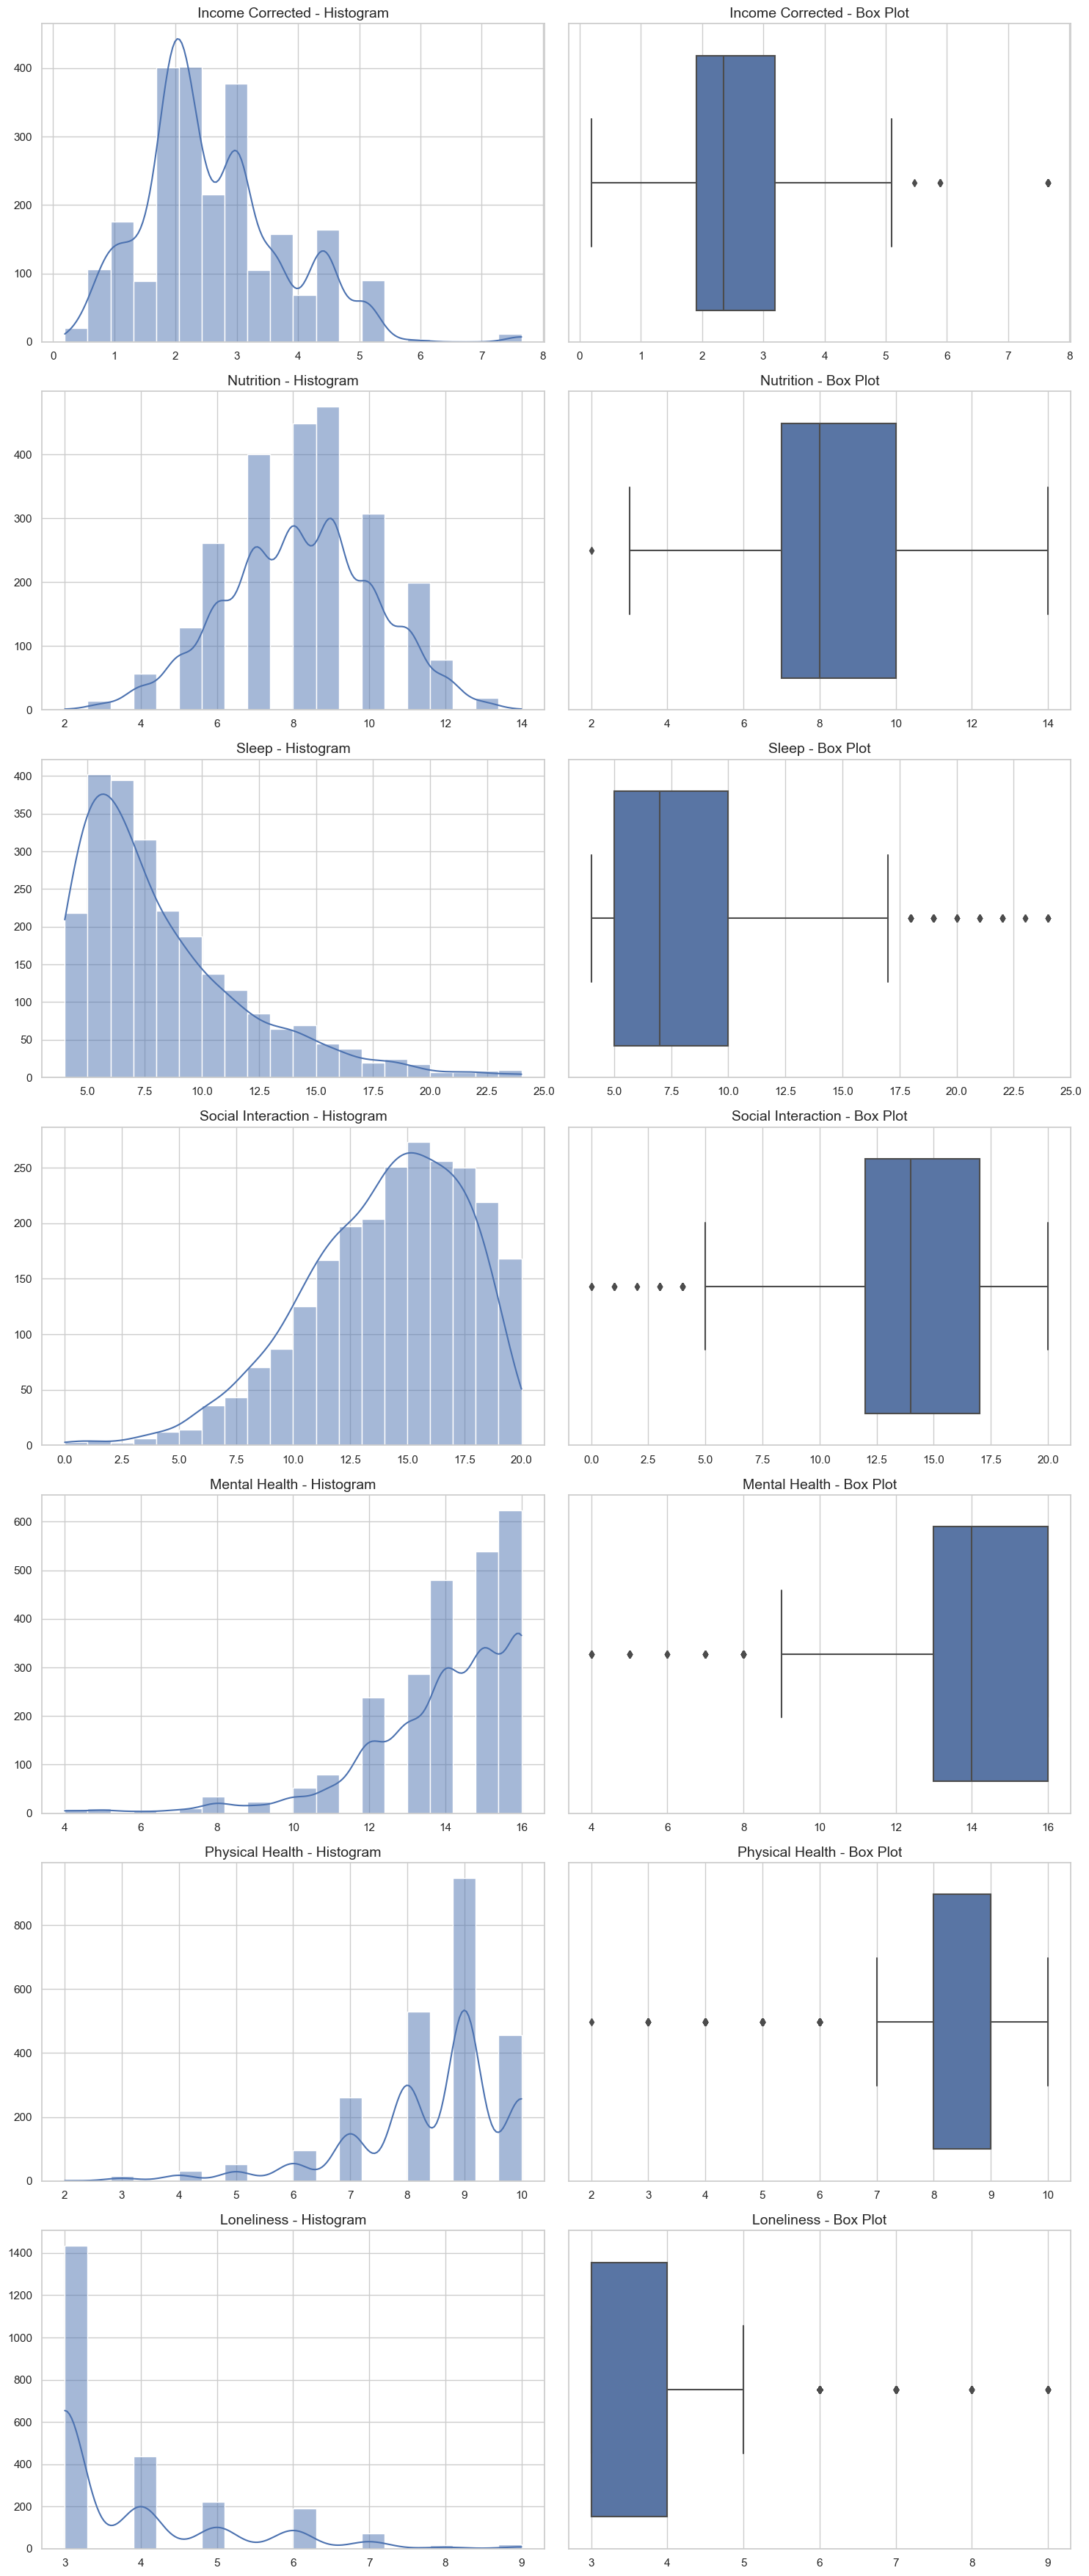

In [96]:
sns.set_style("whitegrid")

variables_to_plot = [
    "income_corrected", "nutrition", "sleep", "social_interaction",
    "mental_health", "physical_health", "loneliness"
]

# Plotting histograms and box plots for each variable
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))  # Adjusted for an additional row for each variable
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for i, var in enumerate(variables_to_plot):
    sns.histplot(df[var], bins=20, ax=axes[2*i], kde=True)
    axes[2*i].set_title(var.replace('_', ' ').title() + ' - Histogram', fontsize=14)
    axes[2*i].set_xlabel('')
    axes[2*i].set_ylabel('')
    
    sns.boxplot(x=df[var], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(var.replace('_', ' ').title() + ' - Box Plot', fontsize=14)
    axes[2*i + 1].set_xlabel('')
    axes[2*i + 1].set_ylabel('')

# Calculating and printing the number of outliers based on z-scores
for var in variables_to_plot:
    z_scores = np.abs(stats.zscore(df[var]))
    outliers = np.where(z_scores > 3)[0]
    print(f"{var} has {len(outliers)} outliers")

# Remove the last subplot(s) (if there are an odd number of variables)
if len(variables_to_plot) % 2 != 0:
    fig.delaxes(axes[-2])
    fig.delaxes(axes[-1])
else:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


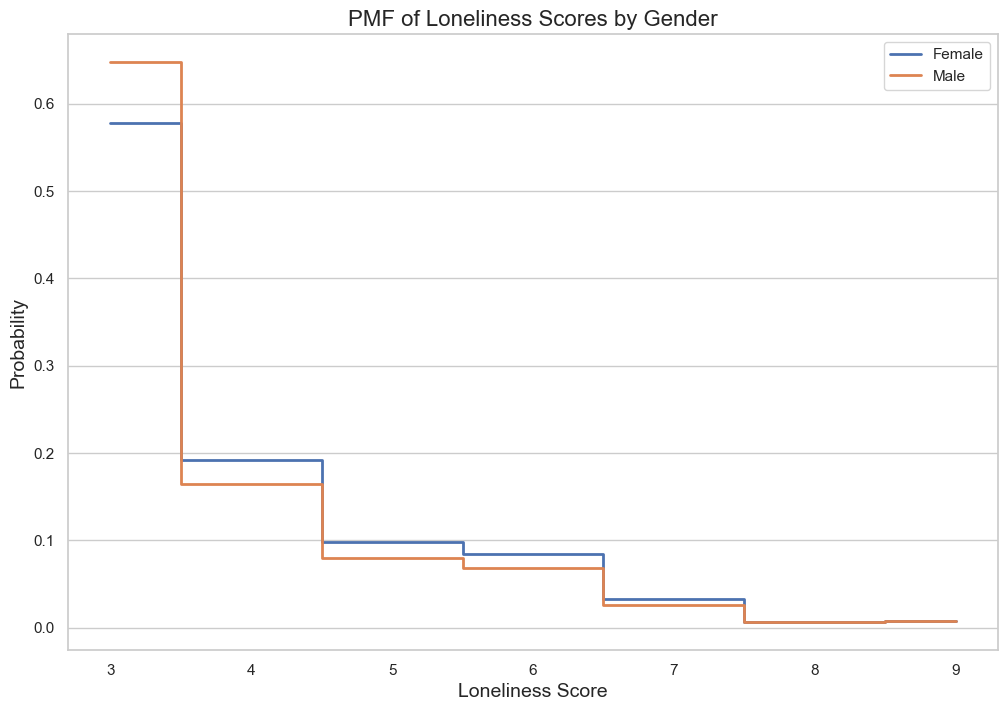

In [97]:
# Filter data for males and females
female_data = df[df['gender'] == 'female']['loneliness'].dropna()
male_data = df[df['gender'] == 'male']['loneliness'].dropna()

# Calculate the PMF (Probability Mass Function) for each group
pmf_female = female_data.value_counts(normalize=True).sort_index()
pmf_male = male_data.value_counts(normalize=True).sort_index()

# Plot the PMFs
plt.figure(figsize=(12, 8))
plt.step(pmf_female.index, pmf_female.values, where='mid', label='Female', linewidth=2)
plt.step(pmf_male.index, pmf_male.values, where='mid', label='Male', linewidth=2)
plt.title('PMF of Loneliness Scores by Gender', fontsize=16)
plt.xlabel('Loneliness Score', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(range(int(min(df['loneliness'])), int(max(df['loneliness'])) + 1))
plt.grid(axis='x')
plt.legend()
plt.show()


In [98]:
# Calculating mean loneliness score for each gender to determine who reports more loneliness on average
mean_loneliness_female = female_data.mean()
mean_loneliness_male = male_data.mean()

mean_loneliness_female, mean_loneliness_male


(3.853932584269663, 3.7099236641221376)

##### Based on the mean loneliness scores:

Females have an average loneliness score of approximately 3.85.
Males have an average loneliness score of approximately 3.71.
This suggests that, on average, females report slightly higher levels of loneliness than males in this dataset.

# CDF

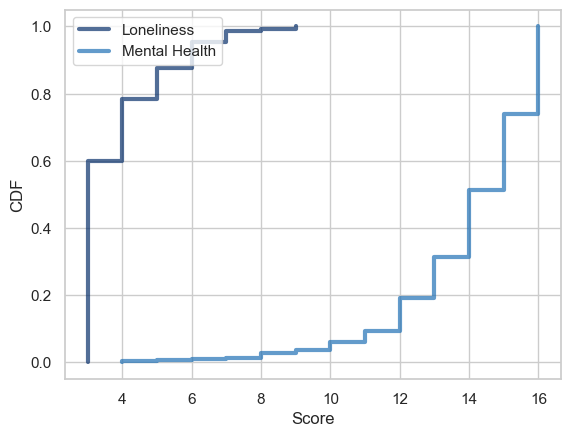

In [99]:
# Creating CDFs
cdf_loneliness = ts.Cdf(df['loneliness'], label='Loneliness')
cdf_mental_health = ts.Cdf(df['mental_health'], label='Mental Health')

# Plotting CDFs
tp.Cdfs([cdf_loneliness, cdf_mental_health])
tp.Config(xlabel='Score', ylabel='CDF', loc='upper left') 
plt.show()


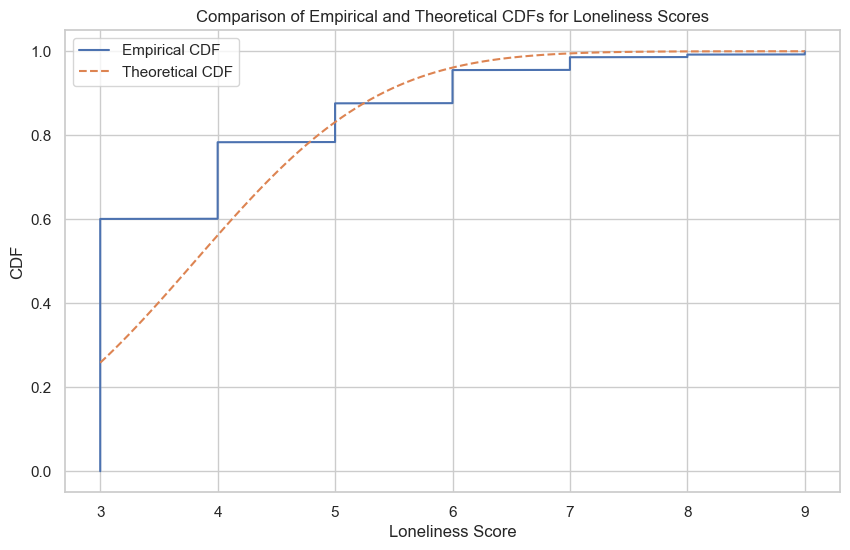

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'df' is your DataFrame and 'loneliness' is the column of interest
# And assuming 'mu' and 'sigma' are the mean and standard deviation of the hypothesized normal distribution

mu = df['loneliness'].mean()
sigma = df['loneliness'].std()

# Create a normal distribution with the hypothesized mean and standard deviation
hypothesized_dist = stats.norm(mu, sigma)

# Generate x values
x_values = np.linspace(min(df['loneliness']), max(df['loneliness']), num=100)

# Calculate the CDF of the hypothesized distribution at these x values
cdf_hypothesized = hypothesized_dist.cdf(x_values)

# Now, let's plot the empirical CDF and the theoretical CDF
plt.figure(figsize=(10, 6))

# Empirical CDF
sorted_data = np.sort(df['loneliness'])
yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data, yvals, label='Empirical CDF')

# Theoretical CDF
plt.plot(x_values, cdf_hypothesized, label='Theoretical CDF', linestyle='--')

plt.xlabel('Loneliness Score')
plt.ylabel('CDF')
plt.title('Comparison of Empirical and Theoretical CDFs for Loneliness Scores')
plt.legend()
plt.show()



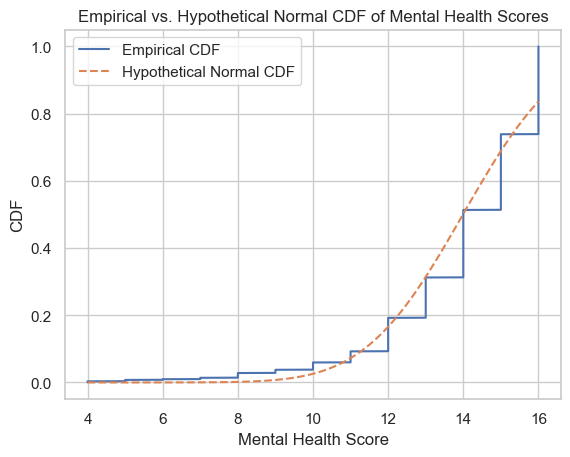

In [101]:
# Calculate mean and standard deviation of 'mental_health'
mu = df['mental_health'].mean()
sigma = df['mental_health'].std()

# Create a normal distribution with the calculated mean and standard deviation
hypothesized_dist = stats.norm(mu, sigma)

# Generate x values for plotting the theoretical CDF
x_values = np.linspace(df['mental_health'].min(), df['mental_health'].max(), num=100)

# Calculate the CDF of the hypothesized distribution at these x values
cdf_hypothesized = hypothesized_dist.cdf(x_values)

# Plotting the empirical CDF
# Sort the 'mental_health' data and calculate the empirical CDF values
sorted_data = np.sort(df['mental_health'])
yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)

# Plot the empirical CDF
plt.plot(sorted_data, yvals, label='Empirical CDF')

# Plot the theoretical CDF
plt.plot(x_values, cdf_hypothesized, label='Hypothetical Normal CDF', linestyle='--')

plt.xlabel('Mental Health Score')
plt.ylabel('CDF')
plt.title('Empirical vs. Hypothetical Normal CDF of Mental Health Scores')
plt.legend()
plt.grid(True)
plt.show()




Covariance between sleep quality and mental health scores: -3.343288499472646
Correlation between sleep quality and mental health scores: -0.43520213887317205


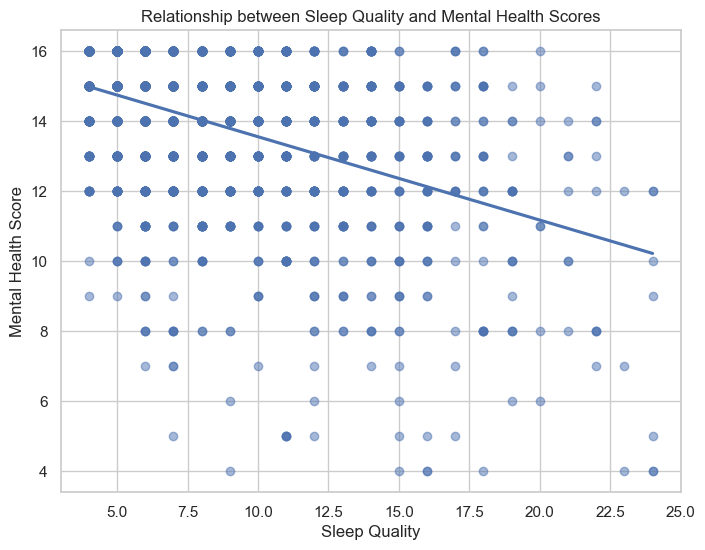

In [102]:
# Calculation section
# Computing the covariance between 'sleep' quality scores and 'mental_health' scores
covariance = df['sleep'].cov(df['mental_health'])

# Computing the correlation coefficient to assess the linear relationship between 'sleep' and 'mental_health'
correlation = df['sleep'].corr(df['mental_health'])

# Display the results of covariance and correlation calculations
print(f'Covariance between sleep quality and mental health scores: {covariance}')
print(f'Correlation between sleep quality and mental health scores: {correlation}')

# Visualization section
# Generating a scatter plot with a regression line to illustrate the relationship between 'sleep' quality and 'mental_health' scores
plt.figure(figsize=(8, 6))  # Setting the figure size for the plot
sns.regplot(x='sleep', y='mental_health', data=df, ci=None, scatter_kws={'alpha':0.5})  # Creating the regplot with seaborn
plt.title('Relationship between Sleep Quality and Mental Health Scores')  # Adding a title to the plot
plt.xlabel('Sleep Quality')  # Labeling the x-axis as 'Sleep Quality'
plt.ylabel('Mental Health Score')  # Labeling the y-axis as 'Mental Health Score'
plt.show()  # Displaying the plot


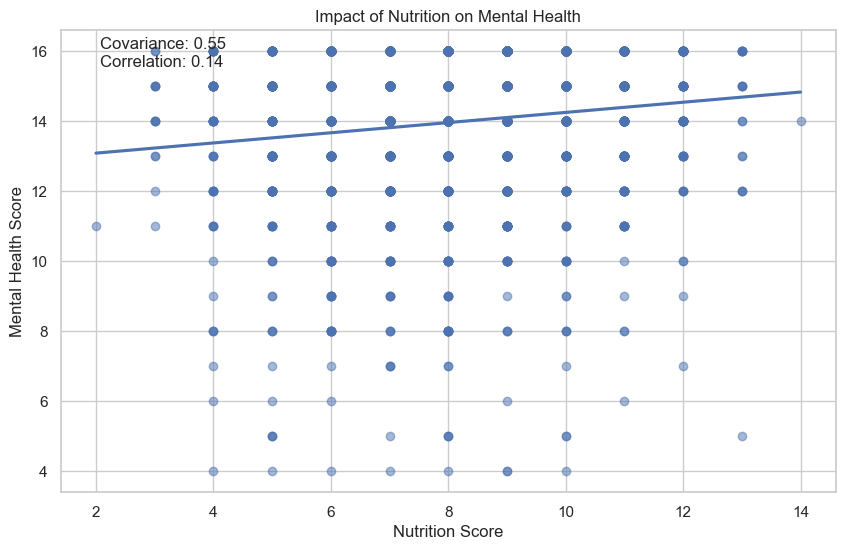

Covariance between Nutrition and Mental Health: 0.549336018172135
Pearson Correlation between Nutrition and Mental Health: 0.1378532086366957


In [103]:
# Preparing for analysis
# Calculating the covariance between 'nutrition' scores and 'mental_health' scores
covariance = df['nutrition'].cov(df['mental_health'])

# Calculating Pearson's correlation to understand the linear relationship between 'nutrition' and 'mental_health'
correlation = df['nutrition'].corr(df['mental_health'])

# Visualizing the relationship
# Setting up the figure for the scatter plot
plt.figure(figsize=(10, 6))
# Plotting 'nutrition' vs 'mental_health' with seaborn's regplot to include a regression line
sns.regplot(x='nutrition', y='mental_health', data=df, ci=None, scatter_kws={'alpha':0.5})

# Annotating the plot with the calculated covariance and correlation, formatted to two decimal places
# The text is positioned based on the axes' relative coordinates (from 0 to 1)
plt.text(0.05, 0.95, f'Covariance: {covariance:.2f}\nCorrelation: {correlation:.2f}', 
         ha='left', va='center', transform=plt.gca().transAxes)

# Final touches on the plot
plt.title('Impact of Nutrition on Mental Health')  # Providing a descriptive title for the plot
plt.xlabel('Nutrition Score')  # Labeling the x-axis
plt.ylabel('Mental Health Score')  # Labeling the y-axis
plt.show()  # Displaying the finalized plot

# Displaying the covariance and correlation results in the console for reference
print(f'Covariance between Nutrition and Mental Health: {covariance}')
print(f'Pearson Correlation between Nutrition and Mental Health: {correlation}')


Correlation coefficient: -0.43520213887317183
P-value: 6.0157555859508125e-111


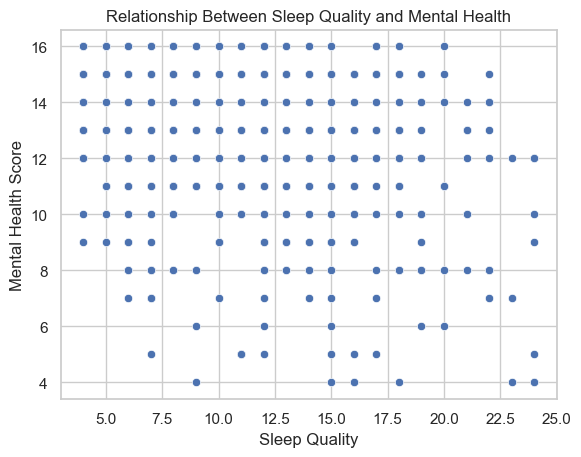

Significant correlation found: Sleep quality is significantly related to mental health scores.


In [104]:
# Assuming necessary libraries, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, and scipy.stats as stats, have been imported

# Statistical Analysis
# Calculating Pearson's correlation coefficient and the associated p-value for 'sleep' and 'mental_health', excluding any missing values
correlation_coefficient, p_value = stats.pearsonr(df['sleep'].dropna(), df['mental_health'].dropna())

# Displaying the calculated correlation coefficient and p-value
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

# Data Visualization
# Generating a scatter plot to visualize the relationship between 'sleep' quality and 'mental health' scores
sns.scatterplot(x='sleep', y='mental_health', data=df)
plt.xlabel('Sleep Quality')  # Setting the label for the x-axis
plt.ylabel('Mental Health Score')  # Setting the label for the y-axis
plt.title('Relationship Between Sleep Quality and Mental Health')  # Adding a title to the plot
plt.show()  # Displaying the plot

# Results Interpretation
alpha = 0.05  # Setting the significance level
# Interpreting the p-value in the context of the significance level to decide on the null hypothesis
if p_value < alpha:
    print('Significant correlation found: Sleep quality is significantly related to mental health scores.')
else:
    print('No significant correlation found: The relationship between sleep quality and mental health scores is not statistically significant.')



Pearson Correlation Coefficients with Mental Health:
income_corrected      0.10
nutrition             0.14
sleep                -0.44
loneliness           -0.49
social_interaction    0.16


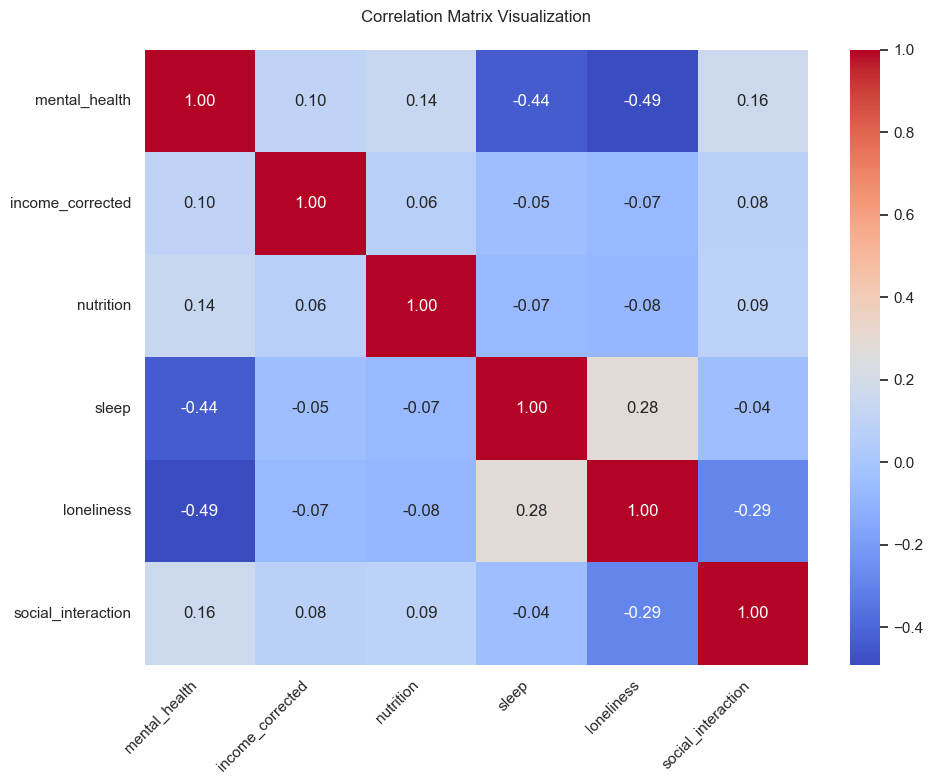

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it has already been loaded

# Convert categorical columns to numeric if necessary
# This is a placeholder - you'll need to adapt this to your specific data.
# For example, if 'income_corrected' was categorical with values like 'Low', 'Medium', 'High',
# you would convert it like this:
# df['income_corrected'] = df['income_corrected'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Now, calculate the correlation matrix only for numeric columns
numeric_cols = ['mental_health', 'income_corrected', 'nutrition', 
                'sleep', 'loneliness', 'social_interaction']
numeric_df = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Coerce errors will set non-numeric to NaN

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation with 'mental_health' for each variable
print("Pearson Correlation Coefficients with Mental Health:")
print(correlation_matrix.loc['mental_health'].drop('mental_health').round(2).to_string())

# Visualize the entire correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Visualization", pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()



In [108]:
# Define the dependent variable
y = df['mental_health']

# Define the independent variables and add a constant for the intercept
X = df[['income_corrected', 'nutrition', 'sleep', 'social_interaction', 'physical_health', 'loneliness']]
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          mental_health   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     257.3
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          4.55e-254
Time:                        20:22:58   Log-Likelihood:                -4505.8
No. Observations:                2388   AIC:                             9026.
Df Residuals:                    2381   BIC:                             9066.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.6487      0